Operator testing
=========

## SPR Test 1

Have implemented a single SPR operator that additionally creates and deletes multifurcations.  This is a universal operator which should traverse the entire space of trees supported by the $\beta$-coalescent.

This test involves using the SPR operator with polytomy creation turned on ($p=0.9$), sampling still from the pure coalescent distribution ($\alpha=2$):

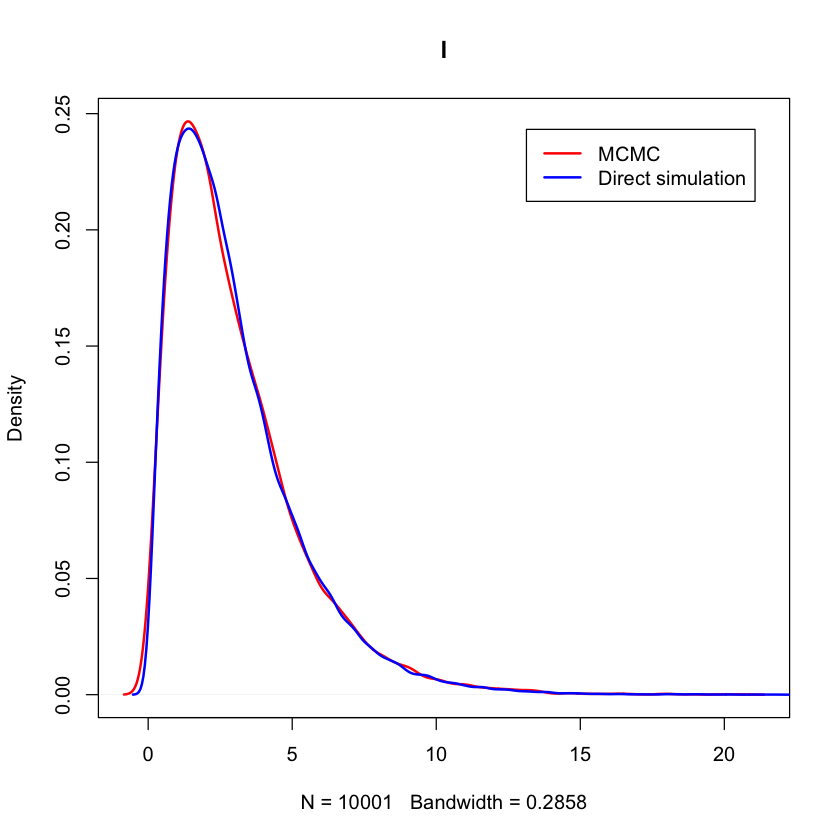

In [1]:
dfs <- read.table("DirectSimulation/simulate_3taxon_alpha2.log", header=T)
df <- read.table("OperatorTests/SPR_3taxon_alpha2.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

## SPR Test 2

This test involves using the SPR operator with polytomy creation turned on ($p=0.9$) and with $\alpha=0.5$, meaning that we are now sampling from a non-trivial $\beta$-coalescent distribution.

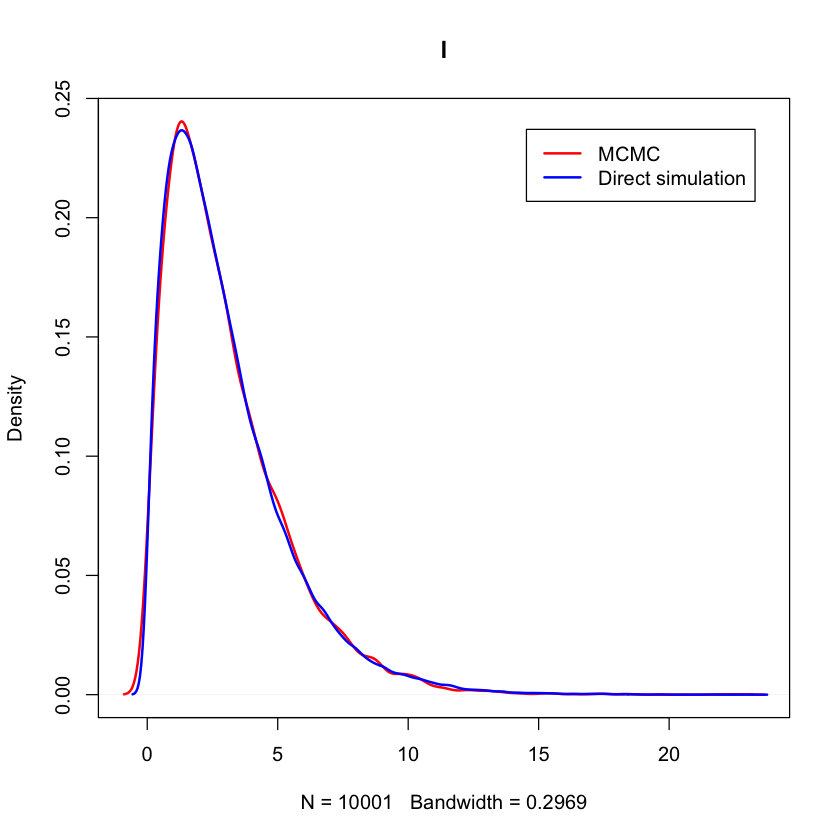

In [2]:
dfs <- read.table("DirectSimulation/simulate_3taxon_alpha1.5.log", header=T)
df <- read.table("OperatorTests/SPR_3taxon_alpha1.5.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

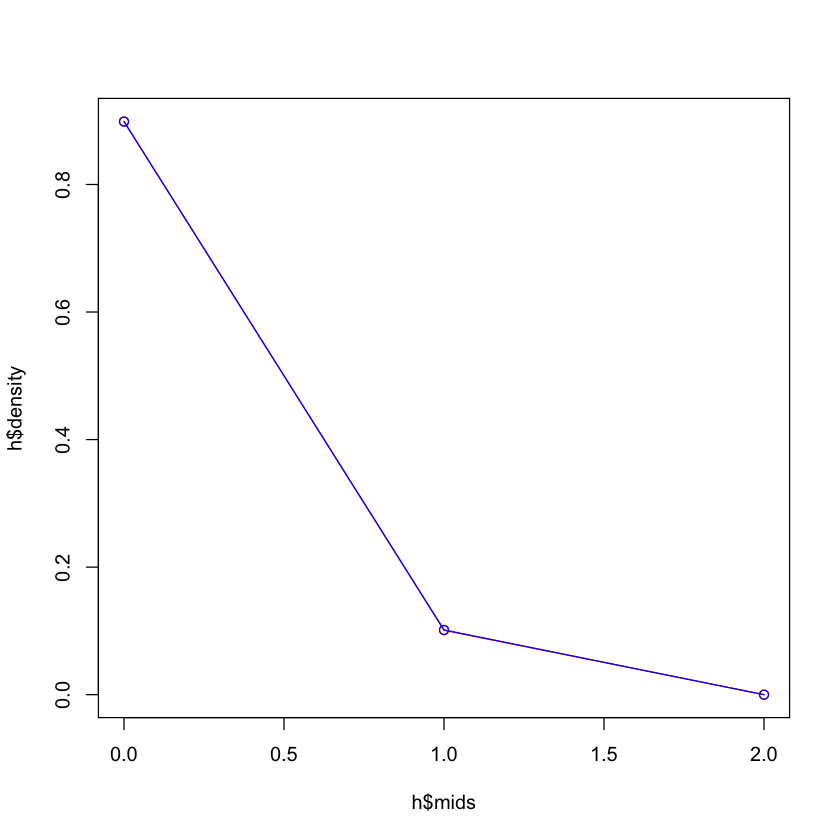

In [3]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,2.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,2.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')

## SPR Test 3

Here we use $\alpha=1.5$ but with the operator sampling the space of 5 taxon trees:

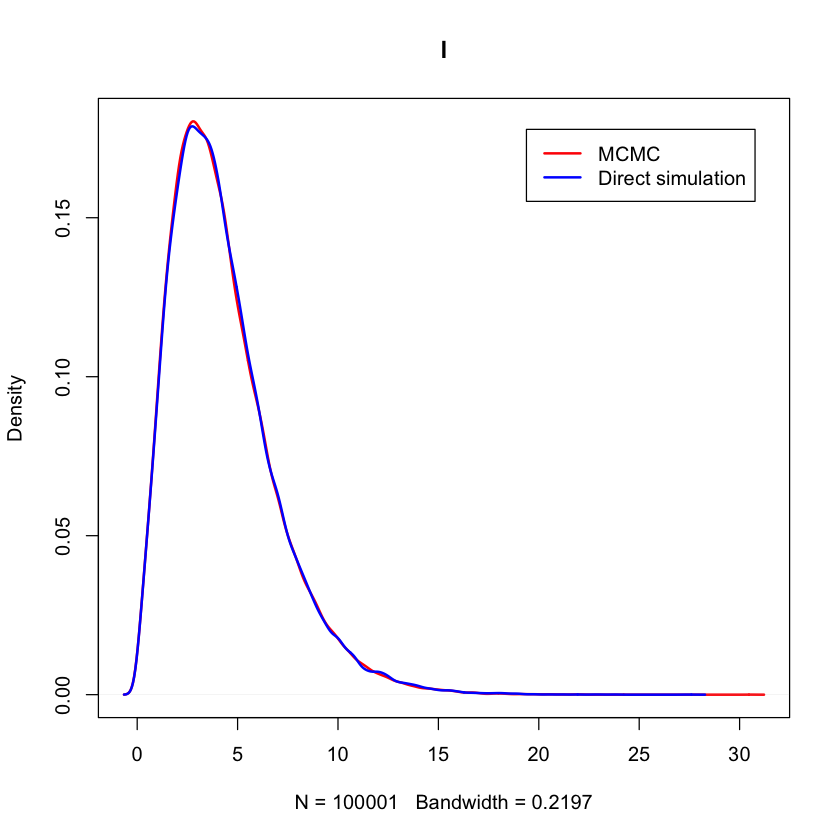

In [17]:
dfs <- read.table("DirectSimulation/simulate_5taxon_alpha1.5.log", header=T)
df <- read.table("OperatorTests/SPR_5taxon_alpha1.5.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

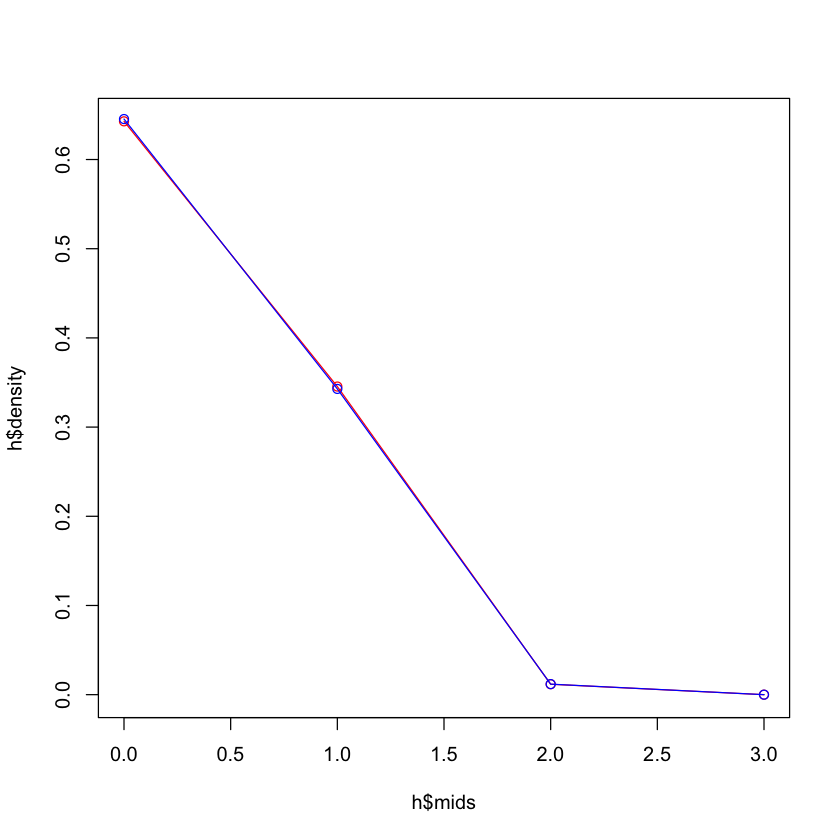

In [18]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,3.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,3.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')

## SPR Test 4

Here we use $\alpha=1.5$ but with the operator sampling the space of **serially sampled** 5 taxon trees:

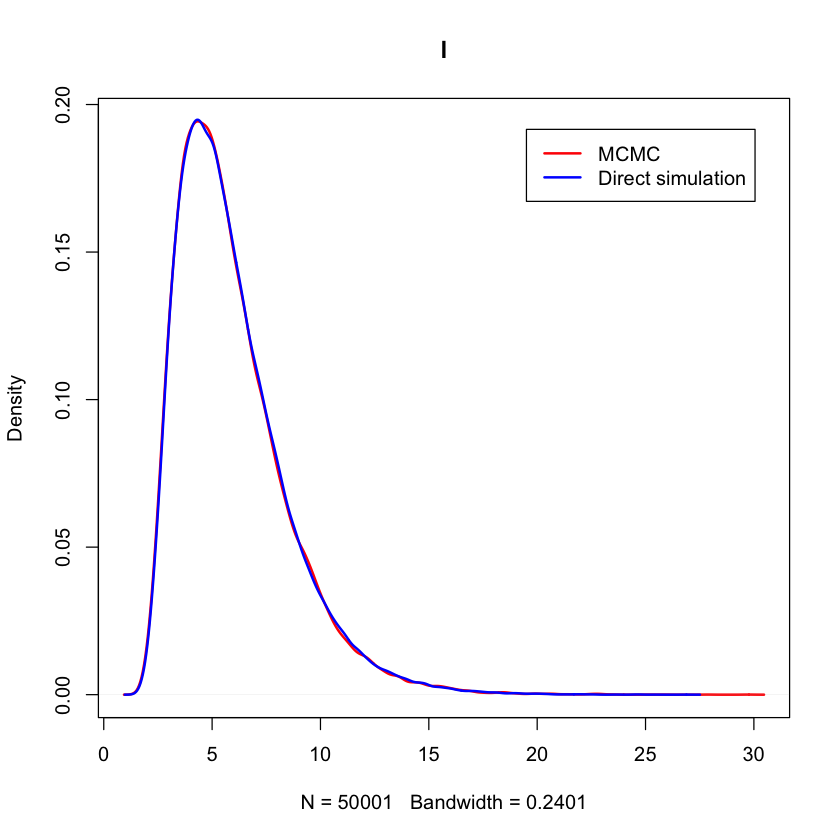

In [6]:
dfs <- read.table("DirectSimulation/simulate_5taxon_alpha1.5_serial.log", header=T)
df <- read.table("OperatorTests/SPR_5taxon_alpha1.5_serial.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

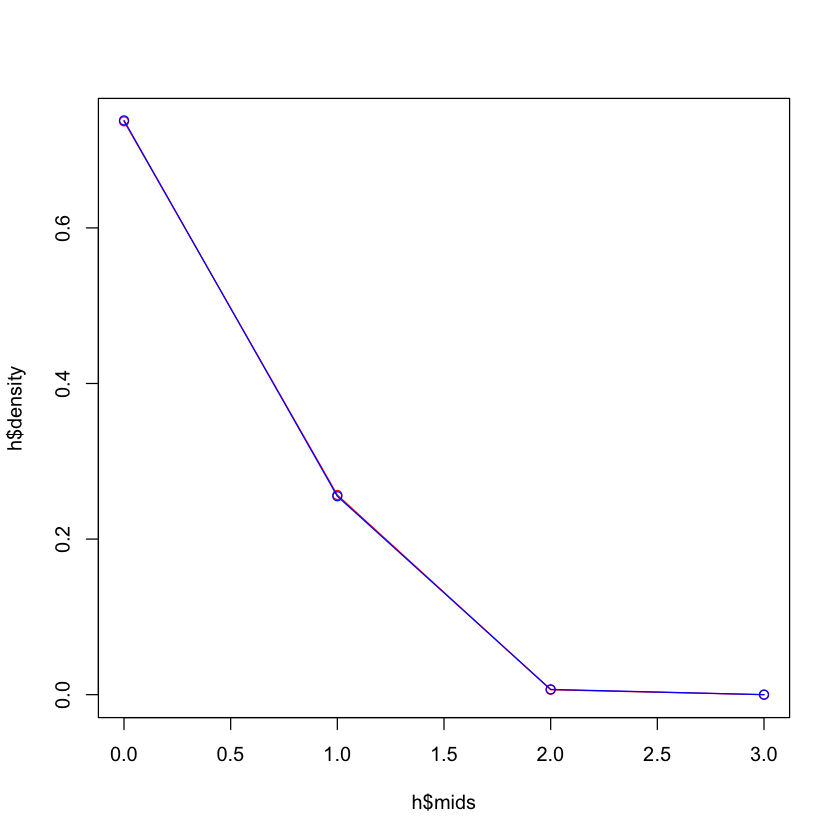

In [7]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,3.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,3.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')

## SPR + Uniform Test

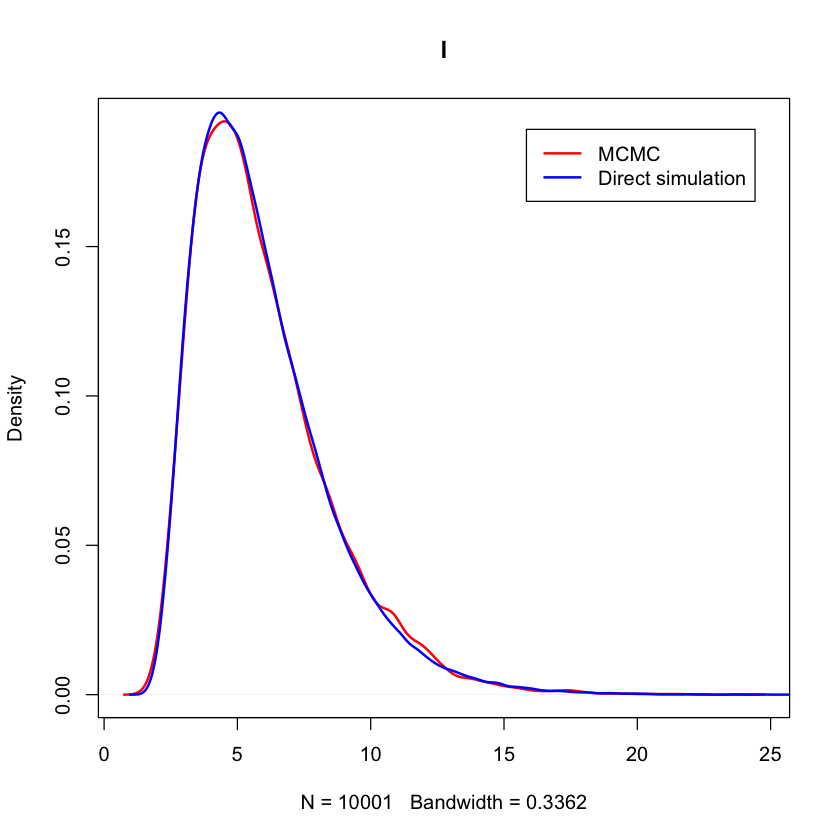

In [8]:
dfs <- read.table("DirectSimulation/simulate_5taxon_alpha1.5_serial.log", header=T)
df <- read.table("OperatorTests/SPR+Uniform_5taxon_alpha1.5_serial.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

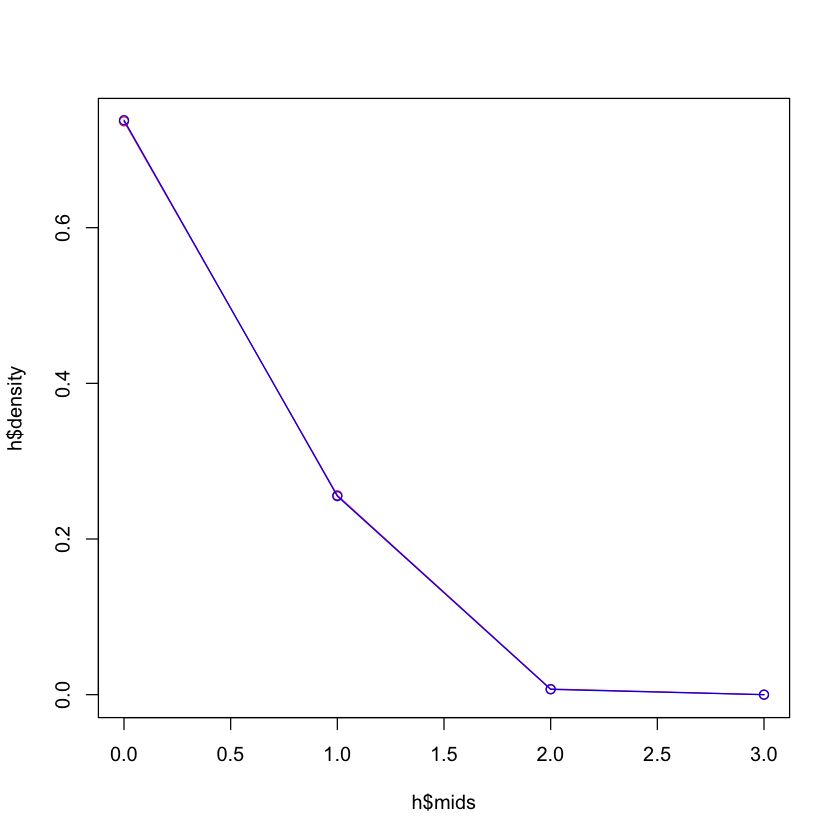

In [9]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,3.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,3.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')

## SPR + ScaleOperator (unmodified)

The unmodified scale operator initially seems like it has a shot at being directly applicable to our style of polytomy tree, but there  a Hastings factor issue to do with the reduced number of independent variables (ages) being scaled:

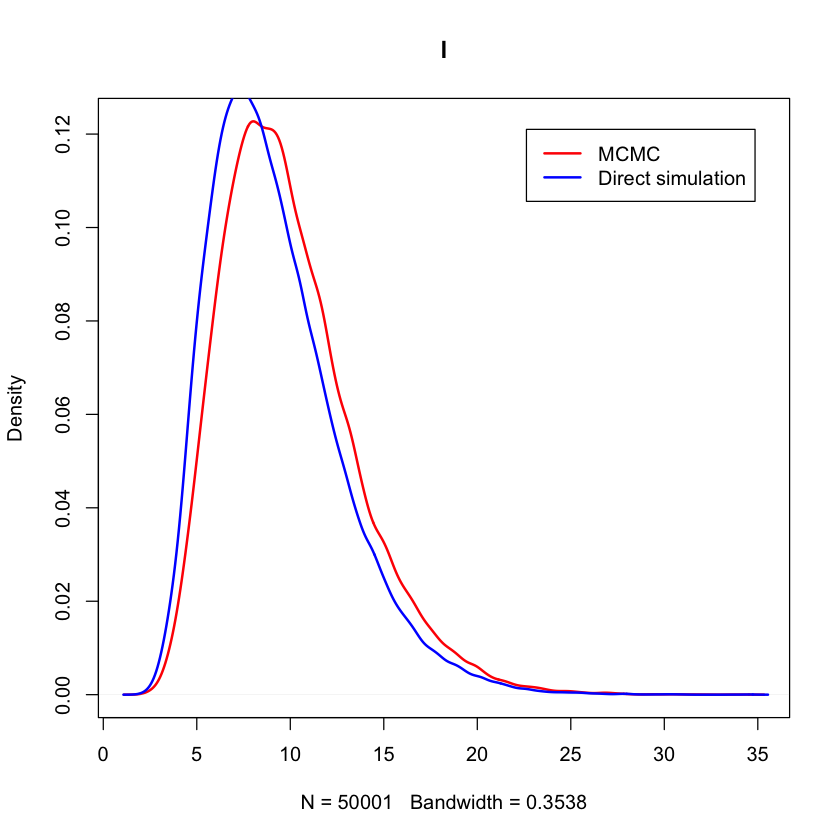

In [40]:
dfs <- read.table("DirectSimulation/simulate_10taxon_alpha1_serial.log", header=T)
df <- read.table("OperatorTests/SPR+UnmodifiedScale_10taxon_alpha1_serial.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

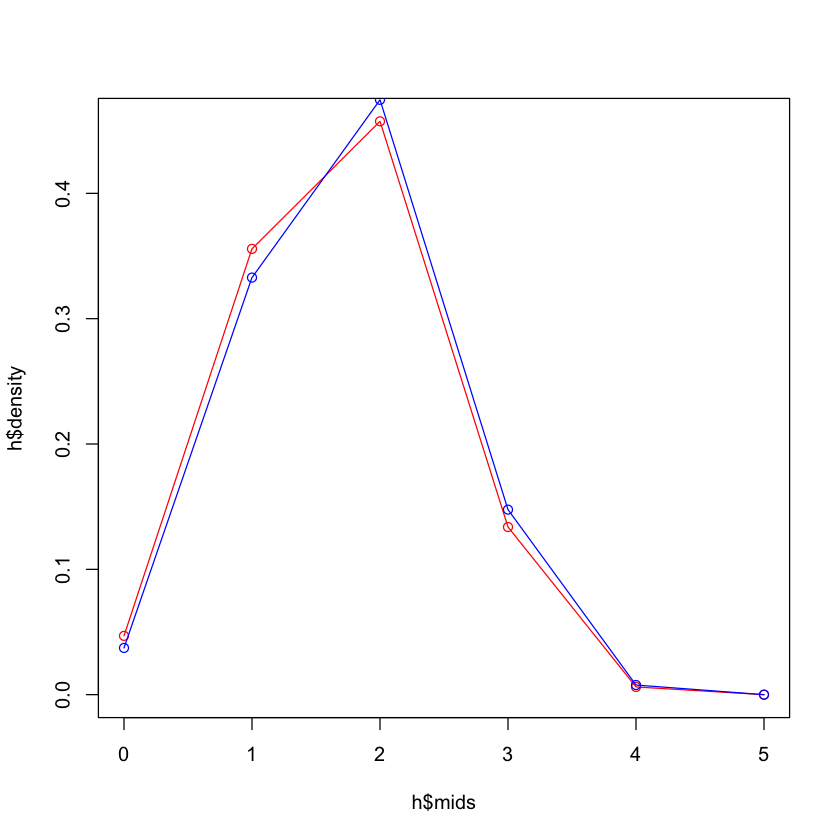

In [41]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,5.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,5.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')

## SPR + ScaleOperator (modified)

The modified scale operator correctly accounts for the actual number of distinct elements in the vector of node ages:

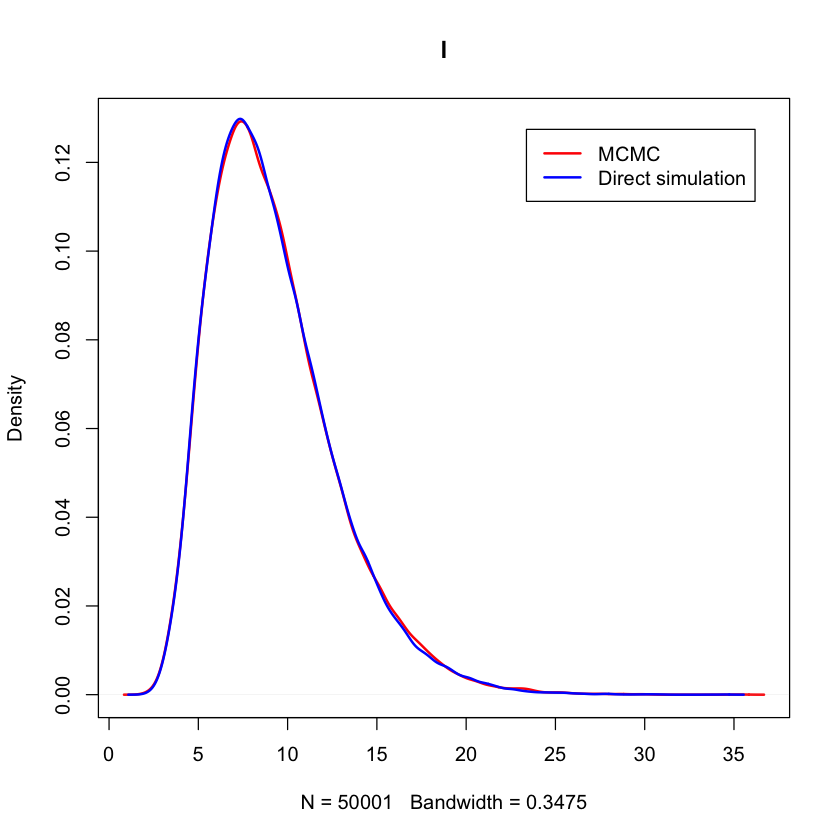

In [48]:
dfs <- read.table("DirectSimulation/simulate_10taxon_alpha1_serial.log", header=T)
df <- read.table("OperatorTests/SPR+ModifiedScale_10taxon_alpha1_serial.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

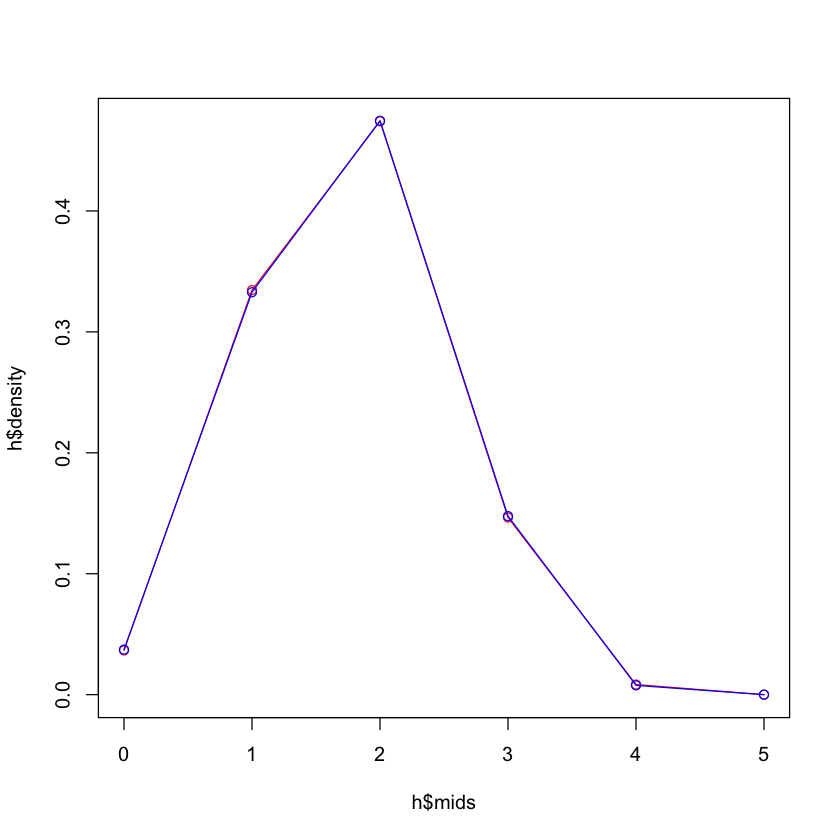

In [47]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,5.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,5.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')

## SPR + Exchange

In [ ]:
dfs <- read.table("DirectSimulation/simulate_10taxon_alpha1_serial.log", header=T)
df <- read.table("OperatorTests/SPR+Exchange_10taxon_alpha1_serial.log", header=T)
plot(density(df$tree.treeLength), 'l', col='red', lwd=2)
lines(density(dfs$tree.treeLength), col='blue', lwd=2)
legend("topright", inset=0.05, c("MCMC", "Direct simulation"),
       lty=1, lwd=2, col=c("red","blue"))

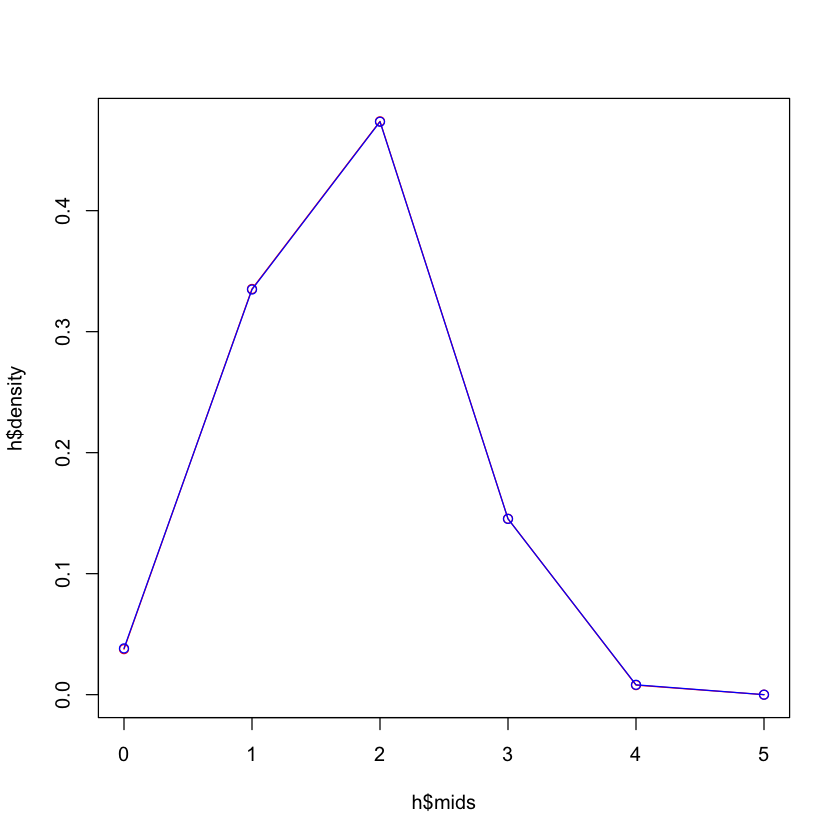

In [7]:
h <- hist(df$PolytomyCount, plot=F, breaks=seq(-0.5,5.5,by=1))
hs <- hist(dfs$PolytomyCount, plot=F, breaks=seq(-0.5,5.5,by=1))
plot(h$mids, h$density, 'o', col='red')
lines(hs$mids, hs$density, 'o', col='blue')